# Project 1 IRWA
Bernat Quintilla - 254530

Eugeni Soler - 253566

Roger Viader - 252282

## Pre-processing

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import nltk
nltk.download('stopwords')
from collections import defaultdict
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import json

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Parse the json file and extract features

In [77]:
docs_path = '/content/drive/Shareddrives/IRWA/Practica 1/IRWA_data_2024/data/farmers-protest-tweets.json'
tweets_dict = {}

with open(docs_path, 'r', encoding='utf-8') as fp:
    lines = fp.readlines()

tweets_by_lang = defaultdict(int)

for i, line in enumerate(lines):
    tweet = json.loads(line.strip())

    tweets_by_lang[tweet['lang']] += 1
    if tweet['lang'] != "en":
      continue

    tweet_id = tweet.get('id')
    tweet_data = {
        'text': tweet.get('content'),
        'date': tweet.get('date'),
        'likes': tweet.get('likeCount'),
        'retweets': tweet.get('retweetCount'),
        'url':tweet.get('url'),
        'hashtags': [words for words in tweet.get('content').split() if words[0]=='#']
    }

    tweets_dict[tweet_id] = tweet_data

In [78]:
print('Top 5 tweets by language:')
tweets_by_lang_sorted = sorted(tweets_by_lang.items(), key=lambda x: x[1], reverse=True)
for i in range(5):
  lang, count = tweets_by_lang_sorted[i]
  print('\t-',i+1,lang,':', count)

total_tweets = 0
for lang, count in tweets_by_lang.items():
  total_tweets += count
print("\nTotal number of tweets in the corpus: {}".format(total_tweets))

Top 5 tweets by language:
	- 1 en : 48429
	- 2 und : 35372
	- 3 hi : 17880
	- 4 pa : 10028
	- 5 in : 1823

Total number of tweets in the corpus: 117407


### Remove stopwords

In [79]:
import re
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

def build_terms(line):
    """
    Preprocess the tweet by lowercasing, removing stop words, stemming, tokenizing, removing urls/hashtags/mentions and removing punctuation.

    Argument:
    line -- string (text) to be preprocessed

    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    sentence_length - meaningful word length of the tweet (without stopwords, hashtags, mentions nor links)
    """
    # Code adapted from practice session
    line= line.lower()
    line= line.split()
    line= [token for token in line if token not in stop_words]

    # Remove hashtags, mentions and links
    line= [token for token in line if not (token.startswith("http") or token.startswith("#") or token.startswith("@"))]

    # Remove anything that is not an alphabetic character (punctuation marks and numbers) and substitute it by a blank space.
    line = ' '.join(line)
    line = re.sub(r'[^a-zA-Z\s]', ' ', line)
    line= line.split()

    # Stem words.
    line= [stemmer.stem(token) for token in line]
    sentence_length = len(line)
    return line, sentence_length

In [80]:
for tweets in tweets_dict:
    tweets_dict[tweets]['text_processed'],tweets_dict[tweets]['length'] = build_terms(tweets_dict[tweets]['text'])

In [81]:
print(tweets_dict[1364505991887347714]['text_processed'])

['watch', 'full', 'video']


### Exploratory Data Analysis

Average tweet length

In [82]:
sum = [0, 0, 0]
for tweets in tweets_dict:
    sum[0] += tweets_dict[tweets]['length']
    sum[1] += len(tweets_dict[tweets]['text'].split())
    sum[2] += len(tweets_dict[tweets]['text'])

avg_tweet_proc = sum[0]/len(tweets_dict)
avg_tweet_raw =  sum[1]/len(tweets_dict)
avg_tweet_char = sum[2]/len(tweets_dict)

print("Average tweet length after process: \t{} words".format(round(avg_tweet_proc,3)))
print("Average tweet length before process:\t{} words".format(round(avg_tweet_raw,3)))
print("Average tweet length in characters: \t{} chars".format(round(avg_tweet_char,3)))

Average tweet length after process: 	10.558 words
Average tweet length before process:	22.236 words
Average tweet length in characters: 	179.26 chars


Vocabulary size

In [83]:
distinct_words = set()
for tweets in tweets_dict:
    distinct_words |= set(tweets_dict[tweets]['text_processed'])

print("Vocabulary size: {} distinct processed words".format(len(distinct_words)))

Vocabulary size: 18024 distinct processed words


Ranking of tweets more retweeted

In [84]:
sorted_by_retweet = sorted(tweets_dict.items(), key=lambda x: x[1]['retweets'], reverse=True)
for i in range(5):
  print(i+1,' (',sorted_by_retweet[i][1]['retweets'],' rt ): ', sorted_by_retweet[i][1]['text'],'\n')

1  ( 6164  rt ):  There's a #FarmersProtest happening in Germany.

But the German Govt didn’t block their path with barbed wires, dig highways or label them Anti-National. And neither did the Govt declare it an ‘internal matter’ where others can’t comment. I guess that’s how democracies work. https://t.co/pZtigTgWT8 

2  ( 4673  rt ):  disha ravi, a 21-year-old climate activist, has been arrested by delhi police for sharing a toolkit @GretaThunberg  posted in support of the #farmersprotest. 

disha’s arrest is alarming and the world needs to pay attention. #freedisharavi

https://t.co/IYGsLpNjwZ 

3  ( 3742  rt ):  Disha Ravi broke down in court room and told judge that she had merely edited two lines in the toolkit and was supporting farmers. What is wrong in that? This is how this nation treats anyone who spreads awareness. #FarmersProtest 

4  ( 3332  rt ):  Farmers are so sweet. Y’all have to see this @AmandaCerny @rihanna 🖤🥺 #FarmersProtest #ModiWhereAreMissingFarmers #ReleaseDeta

Ranking of tweets more liked

In [85]:
sorted_by_likes = sorted(tweets_dict.items(), key=lambda x: x[1]['likes'], reverse=True)
for i in range(5):
  print(i+1,' (',sorted_by_likes[i][1]['likes'],' likes ): ', sorted_by_likes[i][1]['text'],'\n')

1  ( 27888  likes ):  There's a #FarmersProtest happening in Germany.

But the German Govt didn’t block their path with barbed wires, dig highways or label them Anti-National. And neither did the Govt declare it an ‘internal matter’ where others can’t comment. I guess that’s how democracies work. https://t.co/pZtigTgWT8 

2  ( 17325  likes ):  Farmers are so sweet. Y’all have to see this @AmandaCerny @rihanna 🖤🥺 #FarmersProtest #ModiWhereAreMissingFarmers #ReleaseDetainedFarmers https://t.co/STVWhWvBvQ 

3  ( 12949  likes ):  Bollywood has betrayed Panjab &amp; the farmers of India ! 

Heroes to Zeroes !! 

#FarmersProtest #StandWithFarmers 

4  ( 12273  likes ):  Wish you fly over the Delhi border and look at the tough times farmers are facing.. #FarmersProtest https://t.co/Hrhpv6qgcn 

5  ( 10403  likes ):  Disha Ravi broke down in court room and told judge that she had merely edited two lines in the toolkit and was supporting farmers. What is wrong in that? This is how this nation t

Wordcloud

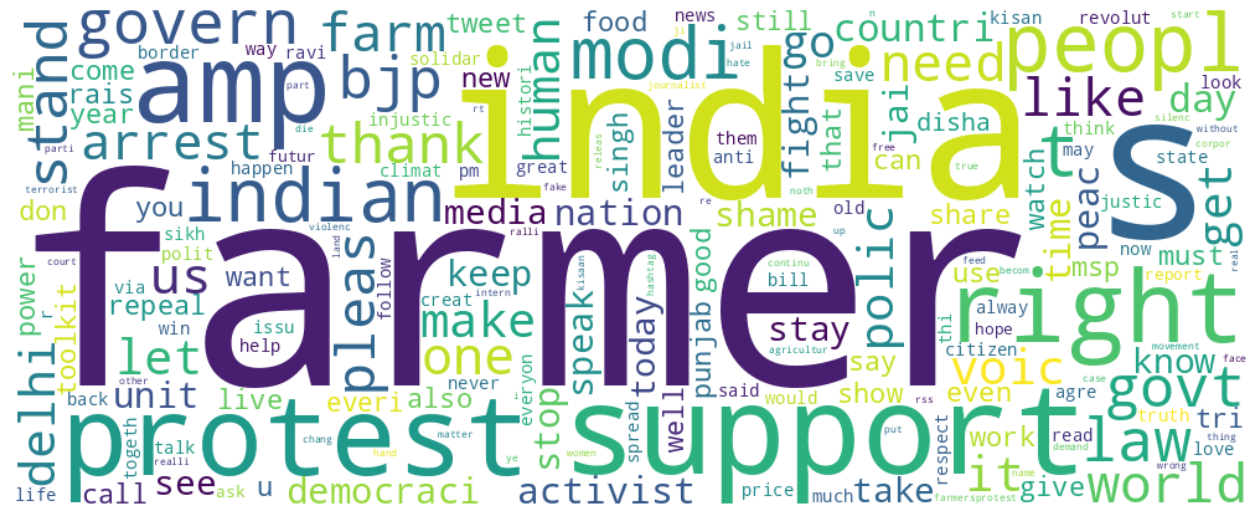

In [86]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

freq = defaultdict(int)
for tweets in tweets_dict:
    text = tweets_dict[tweets]['text_processed']
    for word in text:
      freq[word] += 1
# Generate the word cloud
farmer_wordcloud = WordCloud(width=1000, height=400, background_color='white')
farmer_wordcloud.generate_from_frequencies(freq)

# Plot the word cloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(farmer_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

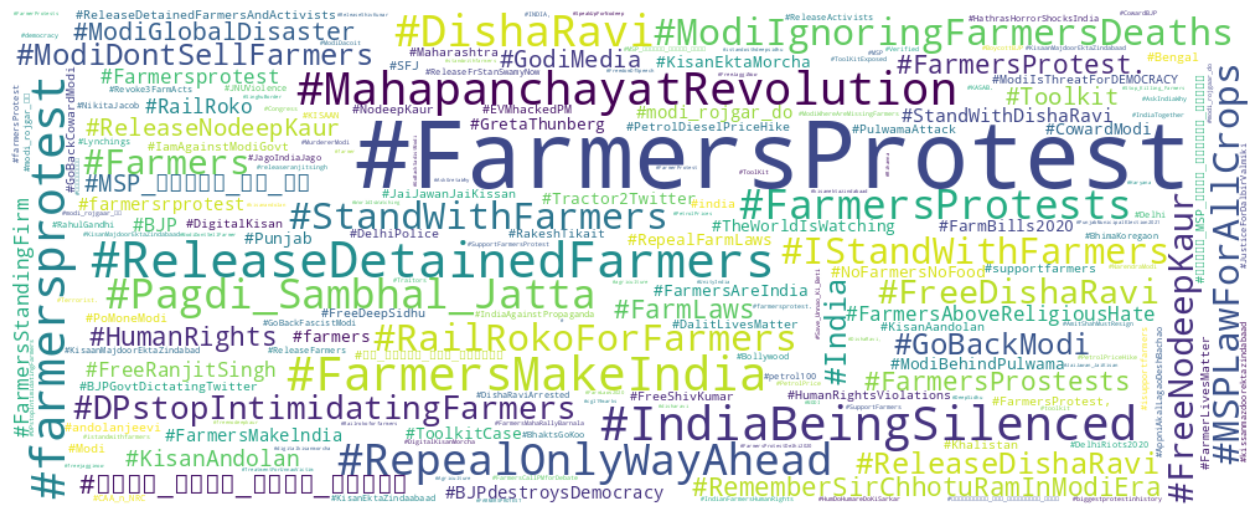

In [87]:
freq = defaultdict(int)
for tweets in tweets_dict:
    hashtags = tweets_dict[tweets]['hashtags']
    for hashtag in hashtags:
      freq[hashtag] += 1
# Generate the word cloud
farmer_wordcloud = WordCloud(width=1000, height=400, background_color='white')
farmer_wordcloud.generate_from_frequencies(freq)

# Plot the word cloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(farmer_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()